In [303]:
!pip install pingouin

In [304]:
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin as pg

In [306]:
data_level_C = pd.read_csv("precision_levelC.csv")

In [307]:
data_level_C.head()

,Class,PAC,SGD,KNN,GradientBosst,MLP
0,IND,0.93,0.90,0.67,0.90,0.92
1,GRP,0.96,0.88,0.83,0.91,0.87
2,OTH,0.94,1.00,0.00,0.33,0.67


In [308]:
data_level_C.mean(axis = 0)

PAC              0.943333
SGD              0.926667
KNN              0.500000
GradientBosst    0.713333
MLP              0.820000
dtype: float64

#### Looks like the mean is higher in the PAC algorithmn, we might be tempted to say PAC is best but let us conduct more analysis and tests on this precision data set

<AxesSubplot:>

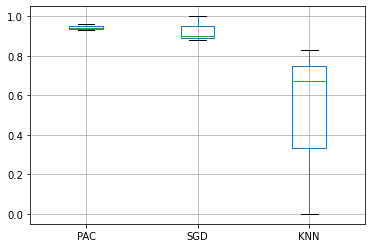

In [309]:
data_level_C.boxplot(column=['PAC','SGD','KNN'])

<AxesSubplot:>

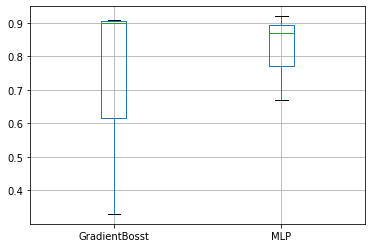

In [312]:
data_level_C.boxplot(column=['GradientBosst',"MLP"])

#### The box plot doesnt give any extra information than what we obtained by calculating the mean, it is just a visual representation

# Hypothesis Testing

- Null hypothesis (H0) - There is no difference in the mean precision.
- Alternate hypothesis (H1) - The difference is significant.
- t-test is used for the same, as the classifiers are run on the same dataset, we perform paired t-test.
- p-value is P(D|H0), so smaller the p-value, more confident we are of Null Hypothesis being false.
- If they are below siginificance level like 0.05 or 0.01 then we can reject the null hypothesis.

In [313]:
data_level_C.head()

,Class,PAC,SGD,KNN,GradientBosst,MLP
0,IND,0.93,0.90,0.67,0.90,0.92
1,GRP,0.96,0.88,0.83,0.91,0.87
2,OTH,0.94,1.00,0.00,0.33,0.67


In [314]:
#print(data_level_A.iloc[:,1], data_level_A.iloc[:,2])
print(data_level_C.iloc[:,1])
precision_only_data = data_level_C.iloc[:,1:]

0    0.93
1    0.96
2    0.94
Name: PAC, dtype: float64


In [315]:
precision_only_data

,PAC,SGD,KNN,GradientBosst,MLP
0,0.93,0.90,0.67,0.90,0.92
1,0.96,0.88,0.83,0.91,0.87
2,0.94,1.00,0.00,0.33,0.67


In [316]:
precision_only_data.iloc[:,0]

0    0.93
1    0.96
2    0.94
Name: PAC, dtype: float64

In [317]:
stats.ttest_rel(data_level_C.iloc[:,1], data_level_C.iloc[:,5])

Ttest_relResult(statistic=1.604153443619622, pvalue=0.249880130143649)

In [318]:
stats.ttest_rel(data_level_C.iloc[:,2], data_level_C.iloc[:,4])

Ttest_relResult(statistic=0.9336352737716852, pvalue=0.4490532556562217)

In [328]:
data_level_C.iloc[:,3]

0    0.67
1    0.83
2    0.00
Name: KNN, dtype: float64

In [329]:
stats.ttest_rel(data_level_C.iloc[:,3], data_level_C.iloc[:,4])

Ttest_relResult(statistic=-2.936521393543192, pvalue=0.09903825552802634)

In [330]:
stats.ttest_rel(data_level_C.iloc[:,1], data_level_C.iloc[:,2])

Ttest_relResult(statistic=0.4068942293855791, pvalue=0.7234993681953349)

In [331]:
stats.ttest_rel(precision_only_data.iloc[:,0], precision_only_data.iloc[:,1])

Ttest_relResult(statistic=0.4068942293855791, pvalue=0.7234993681953349)

In [332]:
pg.rm_anova(data_level_C.iloc[:,1:5])

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,3,6,2.149134,0.195267,0.517972,0.341399


In [333]:
data_level_C.head()

,Class,PAC,SGD,KNN,GradientBosst,MLP
0,IND,0.93,0.90,0.67,0.90,0.92
1,GRP,0.96,0.88,0.83,0.91,0.87
2,OTH,0.94,1.00,0.00,0.33,0.67


In [337]:
U1, p = mannwhitneyu(precision_only_data.iloc[:,0],precision_only_data.iloc[:,3],method="asymptotic")

In [338]:
U1

9.0

In [339]:
p

0.08085559837005224